# Q1

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
d1 = pd.read_csv('delivery_time.csv')
d1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
d1 = d1[['Sorting Time','Delivery Time']]
d1.rename(columns = {'Sorting Time':'sortingtime','Delivery Time':'deliverytime'},inplace = True)
d1

,sortingtime,deliverytime
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


# Scatter plot for understanding relation among two columns

In [15]:
d1['sortingtime'] = pd.to_numeric(d1['sortingtime'], errors='coerce')
d1['deliverytime'] = pd.to_numeric(d1['deliverytime'], errors='coerce')

<Axes: xlabel='sortingtime', ylabel='deliverytime'>

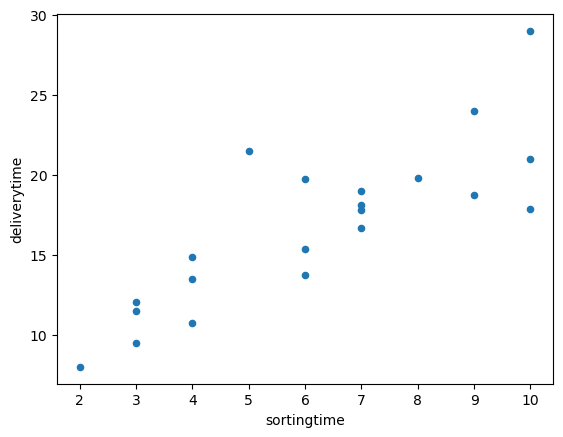

In [16]:
d1.plot.scatter('sortingtime', 'deliverytime')

# Boxplot for outliers detection 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9c88b4110>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9c88b52d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9c88ab910>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9c88b64d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9c88b5190>],
 'means': []}

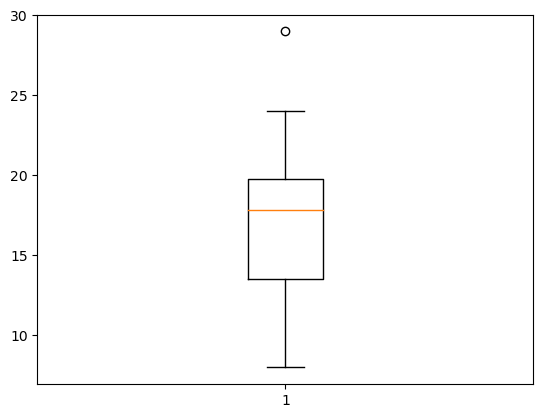

In [17]:
plt.boxplot(x = d1['deliverytime'],whis = 1.4)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9c88ff910>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9c8910c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9c88ff090>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9c8911a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9c8912350>],
 'means': []}

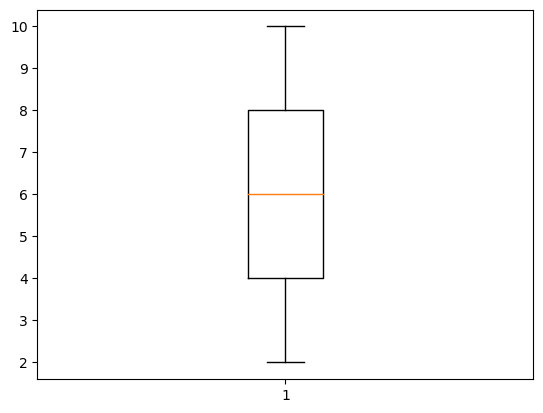

In [18]:
plt.boxplot(x = d1['sortingtime'],whis = 1.3)

# Removing outliers in Target_Feature 

In [19]:
def remove_outliers(d1,x):
    #set limits
    q25,q75 = np.percentile(d1['deliverytime'],25),np.percentile(d1['deliverytime'],75)
    iqr = q75 - q25
    cut_off = iqr*1.4
    lower,upper = 1 ,(q75+cut_off)
    d1 = d1[(d1['deliverytime']<upper) & (d1['deliverytime']>lower)]
    print(d1)
    return d1

In [20]:
d1 = remove_outliers(d1,'deliverytime')

    sortingtime  deliverytime
0            10         21.00
1             4         13.50
2             6         19.75
3             9         24.00
5             6         15.35
6             7         19.00
7             3          9.50
8            10         17.90
9             9         18.75
10            8         19.83
11            4         10.75
12            7         16.68
13            3         11.50
14            3         12.03
15            4         14.88
16            6         13.75
17            7         18.11
18            2          8.00
19            7         17.83
20            5         21.50


{'whiskers': [<matplotlib.lines.Line2D at 0x1f9c8984950>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9c8985bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9c8969850>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9c8986cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9c89874d0>],
 'means': []}

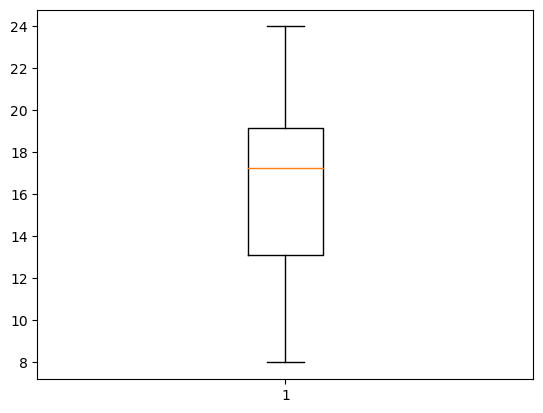

In [21]:
plt.boxplot(x = d1['deliverytime'],whis = 1.4)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6536\919374764.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["deliverytime"],bins = 20,color = 'purple')


<Axes: xlabel='deliverytime', ylabel='Density'>

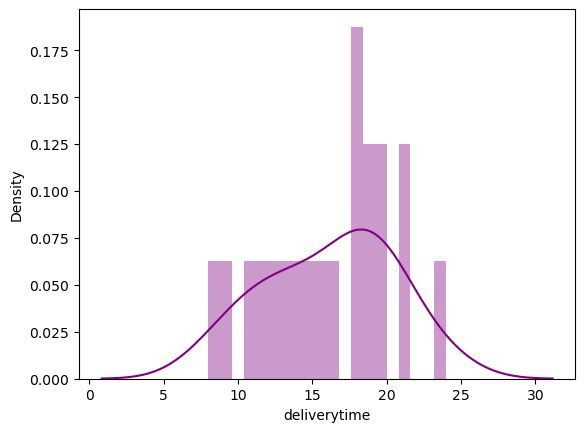

In [22]:
import seaborn as sns
sns.distplot(d1["deliverytime"],bins = 20,color = 'purple')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6536\1679061371.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d1["sortingtime"],bins = 20,color = 'purple')


<Axes: xlabel='sortingtime', ylabel='Density'>

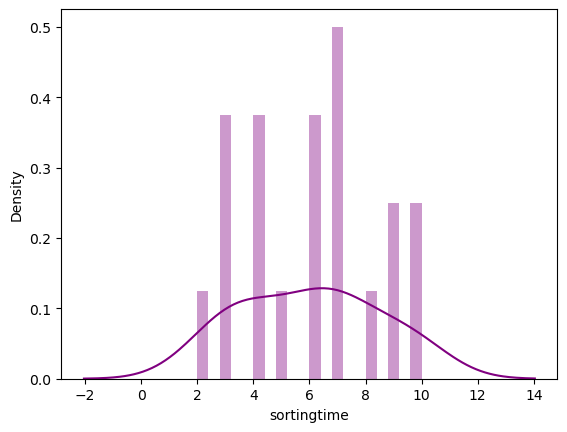

In [23]:
import seaborn as sns
sns.distplot(d1["sortingtime"],bins = 20,color = 'purple')

In [24]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge

In [25]:
# Define feature and target columns
feature_column = d1[['sortingtime']]
target_column = d1[['deliverytime']]

In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_column, target_column, test_size=0.1, random_state=42)

In [27]:
#Regularization of model

ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

Ridge()

In [28]:
# Create a Linear Regression model
lre = LinearRegression()

# Train the model
lre.fit(X_train, y_train)

# Use the model to predict the test set
y_pred = lre.predict(X_test)

# Print the predicted values
print(y_pred)

# Compute the accuracy of the actual model
act_accry = lre.score(X_train, y_train)

# Print the accuracy score
print(f'\nActual Accuracy: {act_accry*100}')


# Compute the accuracy of the model
accuracy = lre.score(X_test, y_test)

# Print the accuracy score
print(f'Prediction Accuracy: {accuracy*100}\n')

# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE score
print(f'Root Mean Squared Error: {rmse}\n')

[[21.84429539]
 [10.89014905]]

Actual Accuracy: 57.408461087020626
Prediction Accuracy: 89.2712470409529

Root Mean Squared Error: 2.129060385521603



# Apply transformations

In [29]:
from sklearn.metrics import mean_squared_error
transformations = {'LOG': np.log, 'SQRT': np.sqrt, 'SQUARE': np.square}

for name, func in transformations.items():
    # Handle NaN and infinite values before applying transformations
    X_train_transformed = func(X_train)

    # Train the model
    lre.fit(X_train_transformed, y_train)

    # Use the model to predict the test set
    X_test_transformed = func(X_test)
    y_pred = lre.predict(X_test_transformed)

    # Print the predicted values
    print(f'\n{name} transformation predictions:\n{y_pred}')

    # Compute the accuracy of the actual model
    act_accry = lre.score(X_train_transformed, y_train)

    # Print the accuracy score
    print(f'{name} transformation Actual Accuracy: {act_accry*100}')

    # Compute the accuracy of the model
    accuracy = lre.score(X_test_transformed, y_test)

    # Print the accuracy score
    print(f'{name} transformation Prediction Accuracy: {accuracy*100}')

    # Compute the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Print the RMSE score
    print(f'{name} transformation Root Mean Squared Error: {rmse}\n\n')


LOG transformation predictions:
[[20.97735971]
 [ 8.1932677 ]]
LOG transformation Actual Accuracy: 62.39323041449405
LOG transformation Prediction Accuracy: 99.955189366464
LOG transformation Root Mean Squared Error: 0.13759539479561267



SQRT transformation predictions:
[[21.43241934]
 [ 9.68465446]]
SQRT transformation Actual Accuracy: 60.33472348651956
SQRT transformation Prediction Accuracy: 96.4200625707638
SQRT transformation Root Mean Squared Error: 1.229846967655851



SQUARE transformation predictions:
[[22.44503096]
 [12.62965386]]
SQUARE transformation Actual Accuracy: 49.73258587585557
SQUARE transformation Prediction Accuracy: 72.16353926338444
SQUARE transformation Root Mean Squared Error: 3.4294175396443167




# Q2

In [30]:
ds2 = pd.read_csv("Salary_Data.csv")
ds2

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [31]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [32]:
ds2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


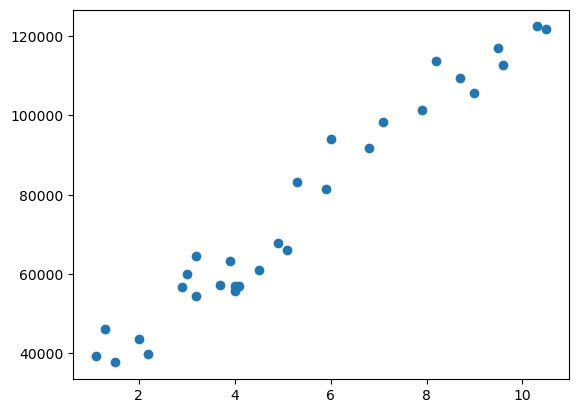

In [33]:
#scatter plot
plt.scatter(x = ds2['YearsExperience'], y = ds2['Salary'])

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scalered = sc.fit_transform(ds2)
ds2 = pd.DataFrame(scalered,columns = ['YearsExperience','Salary'])
ds2

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781
5,-0.864935,-0.718307
6,-0.829096,-0.588158
7,-0.757416,-0.799817
8,-0.757416,-0.428810
9,-0.578216,-0.698013


{'whiskers': [<matplotlib.lines.Line2D object at 0x000001F9CD33FCD0>, <matplotlib.lines.Line2D object at 0x000001F9CD350910>], 'caps': [<matplotlib.lines.Line2D object at 0x000001F9CD3514D0>, <matplotlib.lines.Line2D object at 0x000001F9CD352010>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001F9CD33F050>], 'medians': [<matplotlib.lines.Line2D object at 0x000001F9CD352C10>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001F9CD353650>], 'means': []}


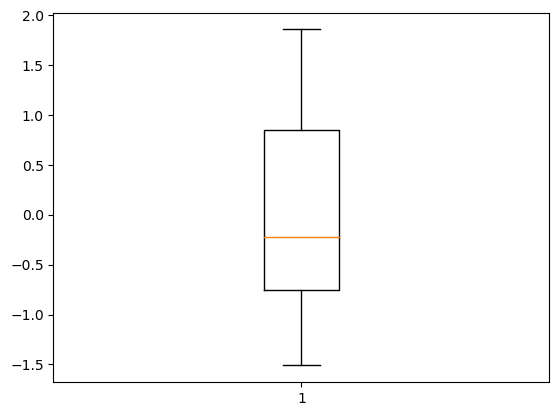

In [35]:
print(plt.boxplot(x = ds2['YearsExperience'],whis = 1.4))

{'whiskers': [<matplotlib.lines.Line2D object at 0x000001F9CD3C1510>, <matplotlib.lines.Line2D object at 0x000001F9CD3C2110>], 'caps': [<matplotlib.lines.Line2D object at 0x000001F9CD3C2C10>, <matplotlib.lines.Line2D object at 0x000001F9CD3C3750>], 'boxes': [<matplotlib.lines.Line2D object at 0x000001F9CD3C08D0>], 'medians': [<matplotlib.lines.Line2D object at 0x000001F9CD3B4750>], 'fliers': [<matplotlib.lines.Line2D object at 0x000001F9CD33F390>], 'means': []}


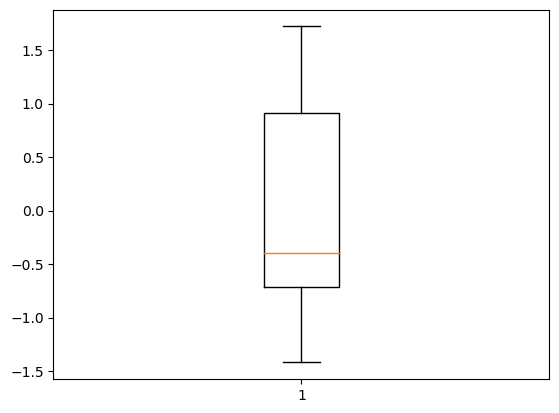

In [36]:
print(plt.boxplot(x = ds2['Salary'],whis = 1.4))

C:\Users\Admin\AppData\Local\Temp\ipykernel_6536\1995078242.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds2["YearsExperience"],bins = 20,color = 'purple')


<Axes: xlabel='YearsExperience', ylabel='Density'>

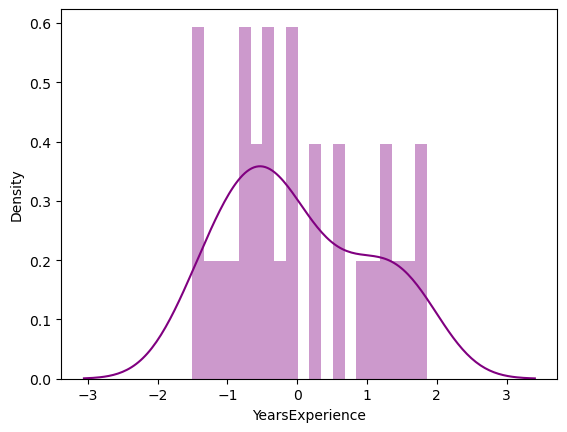

In [37]:
import seaborn as sns
sns.distplot(ds2["YearsExperience"],bins = 20,color = 'purple')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6536\2809867834.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds2["Salary"],bins = 20,color = 'purple')


<Axes: xlabel='Salary', ylabel='Density'>

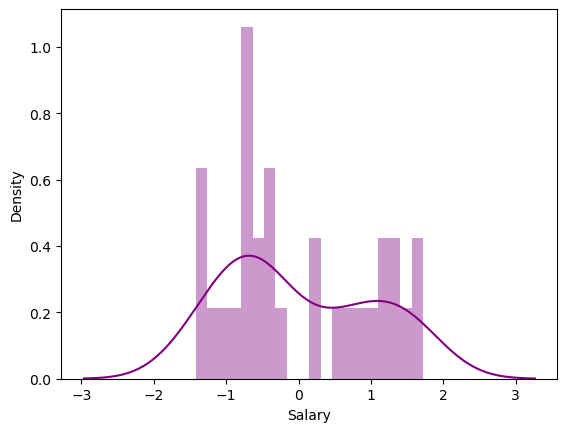

In [38]:
sns.distplot(ds2["Salary"],bins = 20,color = 'purple')

In [39]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.linear_model import Ridge

In [40]:
# Define feature and target columns
feature_column = ds2[['YearsExperience']]
target_column = ds2[['Salary']]

In [41]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(feature_column, target_column, test_size=0.31, random_state=42)

In [42]:
#Regularization of model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [43]:
# Create a Linear Regression model
lre = LinearRegression()

# Train the model
lre.fit(X_train, y_train)

# Use the model to predict the test set
y_pred = lre.predict(X_test)

# Print the predicted values
print(y_pred)

# Compute the accuracy of the actual model
act_accry = lre.score(X_train, y_train)

# Print the accuracy score
print(f'\nActual Accuracy: {act_accry*100}')


# Compute the accuracy of the model
accuracy = lre.score(X_test, y_test)

# Print the accuracy score
print(f'Prediction Accuracy: {accuracy*100}\n')

# Compute the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the RMSE score
print(f'Root Mean Squared Error: {rmse}\n')

[[ 1.47702842]
 [-0.16662213]
 [ 0.98743039]
 [-0.02673698]
 [-0.76113403]
 [-0.58627759]
 [ 1.72182744]
 [ 1.16228683]
 [-0.48136373]
 [-1.49553109]]

Actual Accuracy: 95.49236946181226
Prediction Accuracy: 95.53063138044949

Root Mean Squared Error: 0.22043545330103884



# Applying Transformational Models

In [44]:
from sklearn.metrics import mean_squared_error
# Apply transformations
transformations = {'log': np.log, 'sqrt': np.sqrt, 'square': np.square}

for name, func in transformations.items():
    # Handle NaN and infinite values before applying transformations
    X_train_transformed = np.nan_to_num(func(X_train))

    # Train the model
    lre.fit(X_train_transformed, y_train)

    # Use the model to predict the test set
    X_test_transformed = np.nan_to_num(func(X_test))
    y_pred = lre.predict(X_test_transformed)

    # Print the predicted values
    print(f'\n{name} transformation predictions:\n{y_pred}')

    # Compute the accuracy of the actual model
    act_accry = lre.score(X_train_transformed, y_train)

    # Print the accuracy score
    print(f'{name} transformation Actual Accuracy: {act_accry*100}')

    # Compute the accuracy of the model
    accuracy = lre.score(X_test_transformed, y_test)

    # Print the accuracy score
    print(f'{name} transformation Prediction Accuracy: {accuracy*100}')

    # Compute the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Print the RMSE score
    print(f'{name} transformation Root Mean Squared Error: {rmse}\n\n')


log transformation predictions:
[[-0.17068308]
 [-0.13599793]
 [-0.13874375]
 [-0.13599793]
 [-0.13599793]
 [-0.13599793]
 [-0.1829011 ]
 [-0.15164718]
 [-0.13599793]
 [-0.13599793]]
log transformation Actual Accuracy: 0.1875648600862756
log transformation Prediction Accuracy: -16.719178217208388
log transformation Root Mean Squared Error: 1.126495516575492



sqrt transformation predictions:
[[ 1.52990764]
 [-0.7999901 ]
 [ 1.11195458]
 [-0.7999901 ]
 [-0.7999901 ]
 [-0.7999901 ]
 [ 1.71295021]
 [ 1.27092946]
 [-0.7999901 ]
 [-0.7999901 ]]
sqrt transformation Actual Accuracy: 90.40900052191844
sqrt transformation Prediction Accuracy: 81.91899035463327
sqrt transformation Root Mean Squared Error: 0.44337346297409896



square transformation predictions:
[[ 0.27717749]
 [-0.37679557]
 [-0.08358898]
 [-0.38292649]
 [-0.2224927 ]
 [-0.28942992]
 [ 0.51036809]
 [ 0.02909067]
 [-0.32097064]
 [ 0.25478526]]
square transformation Actual Accuracy: 7.230362562314275
square transformation Predi

C:\Anaconda\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Anaconda\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Anaconda\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)
C:\Anaconda\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)
